### 1. Importing relevant data and libraries
Let us first start off with the usual process of importing all the libraries and important datasets.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [3]:
df=pd.read_csv('cleaned_results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


 Inspect the data and try to understand

In [4]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

First column which is a date column is entered as object. Let us change it into datetime datatype.

In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df.isna().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

Data Visualisation

- Matches per year

Time series analysis of how number of football matches have stacked up year wise.

In [7]:
df['Year']=df['date'].dt.year
df['Count']=1

In [8]:
df_year=df.groupby('Year')['Count'].sum().reset_index()

In [9]:
fig1=px.line(df_year,y='Count',x='Year',height=600,width=800)
fig1.update_layout(title='Number of matches each year',title_x=0.5,template='plotly')
fig1.update_traces(line_color='#AAF0D1')
fig1.show()

- see, the number of football matches have been steadily rising since the 1970s.
- It has also been seen that in every 2 years, there are fluctuations.
- 2020 has however been a disappointment considering the pandemic situation that has halted large portion of the footballing calendar.

Away and home matches

In [10]:
df_h=df.groupby('home_team')['Count'].sum().reset_index().sort_values(by='Count',ascending=False).head(20)
df_a=df.groupby('away_team')['Count'].sum().reset_index().sort_values(by='Count',ascending=False).head(20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



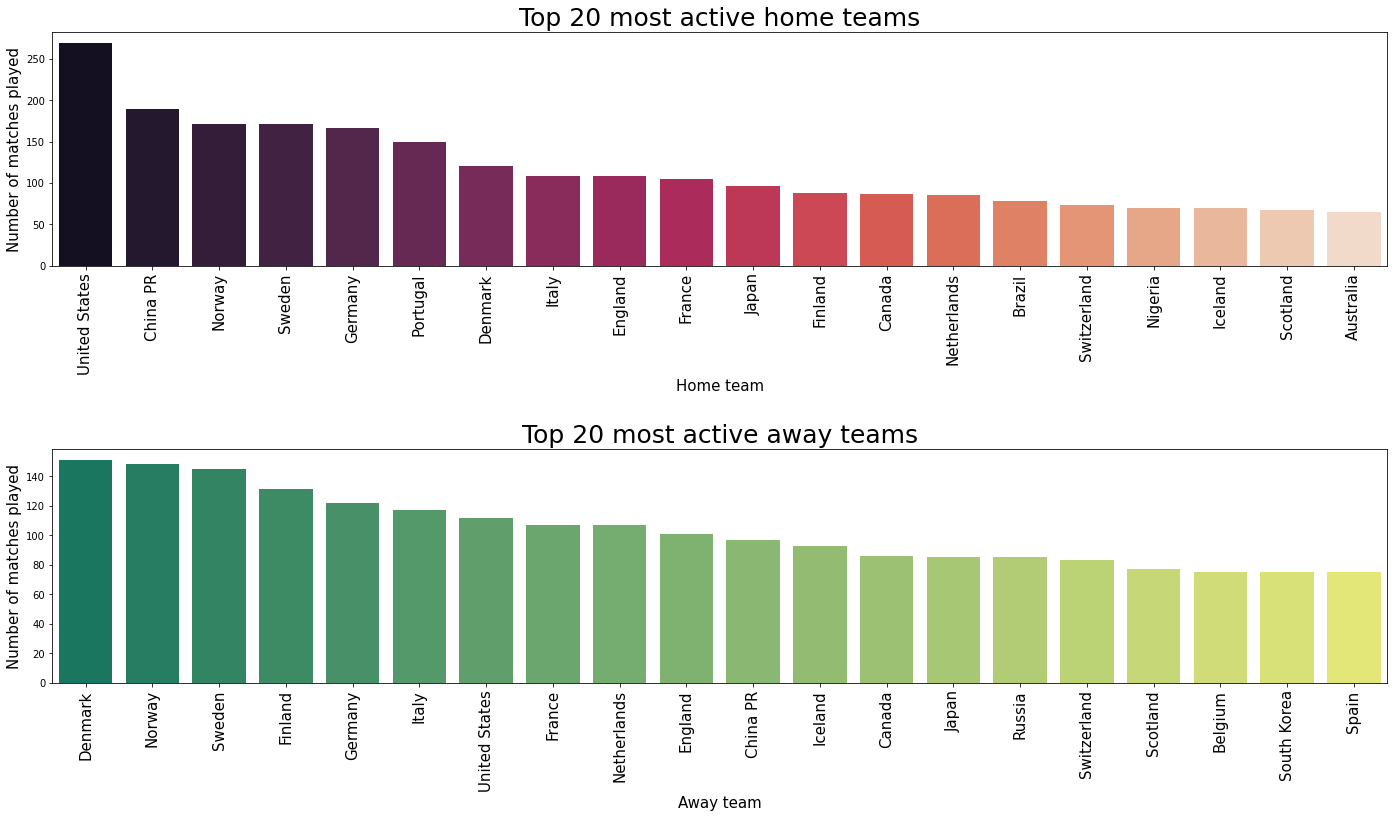

In [11]:
fig2=plt.figure(figsize=(20,12))
ax1=fig2.add_subplot(211)
sns.barplot('home_team','Count',data=df_h,ax=ax1,palette='rocket')
label=df_h['home_team']
ax1.set_xticklabels(label,rotation=90,size=15)
ax1.set_title('Top 20 most active home teams',size=25)
ax1.set_xlabel('Home team',size=15)
ax1.set_ylabel('Number of matches played',size=15)

ax2=fig2.add_subplot(212)
sns.barplot('away_team','Count',data=df_a,ax=ax2,palette='summer')
label=df_a['away_team']
ax2.set_xticklabels(label,rotation=90,size=15)
ax2.set_title('Top 20 most active away teams',size=25)
ax2.set_xlabel('Away team',size=15)
ax2.set_ylabel('Number of matches played',size=15)

fig2.tight_layout(pad=3)

China has been the most avtive home team with over 175 matches played while Denmark has been the most active away team with 140+ matches played.

Tournament
See which tournaments involve the most number of matches

In [12]:
df_tour=df.groupby('tournament')['Count'].sum().reset_index()
fig3=px.pie(df_tour,values='Count',names='tournament',hole=0.3)
fig3.update_layout(title='Tournament wise match distribution',title_x=0.25)
fig3.show()

See chart about 30 % of the matches in football is related to UEFA Euro qualification followed by the Algarve Cup.

Goal Difference
Difference of the scores between the winning and losing team. A high GD means the winning team won by a bigger margin as compared to a winning team with lower GD. Let us see how the GD is distributed.

In [13]:
df['Goal difference']=abs(df['home_score']-df['away_score'])

In [14]:
fig4=px.histogram(df,x='Goal difference',marginal='violin')
fig4.update_layout(title='Goal Difference distribution',title_x=0.5,template='plotly_dark')
fig4.update_traces(opacity=0.9)
fig4.show()

see that most of the matches had a goal difference of 1. This is good as it means the matches weren't one sided and were highly competitive.

High Scoring tournaments
find an evaluation parameter as goals per game. A high goals per game (GPG) means attending any of the matches would mean a chance of witness that many goals which could be a factor while making trips for watching matches. Fans would love to attend matches where there are higher chances of goals scored.

In [15]:
df['Total goals']=df['home_score']+df['away_score']

In [16]:
df_gpg=df.groupby('tournament')[['Count','Total goals']].sum().reset_index()
df_gpg['GPG']=np.round(df_gpg['Total goals']/df_gpg['Count'],0)
df_gpg.sort_values(by='GPG',ascending=False,inplace=True)

In [17]:
fig5=px.bar(df_gpg,x='tournament',y='GPG',color='GPG',height=800,width=1000,labels={'GPG':'Average goals per game','tournament':'Tournament'})
fig5.update_layout(template='plotly')
fig5.show()

see that OFC Nations cup has a very high average goals per game. FIFA WC and UEFA Euro matches have a relatively lowers goals per game number. This is probably because a lot of very well matched teams make it to the final competition and hence, it is not easy to score goals.

High scoring teams

which are the high scoring countries based on home and away matches. We will visualise the data of top 20 teams based on goals per game. In order to make the statistic valid, we will only consider the teams that have played more than 30 matches.

In [18]:
df_nn=df[df['neutral']==False]

df_gpg_home=df_nn.groupby('home_team')[['Count','home_score']].sum().reset_index()
df_gpg_home=df_gpg_home[df_gpg_home['Count']>30]
df_gpg_home['GPG']=np.round(df_gpg_home['home_score']/df_gpg_home['Count'],0)
df_gpg_home.sort_values(by='GPG',ascending=False,inplace=True)

df_gpg_away=df_nn.groupby('home_team')[['Count','away_score']].sum().reset_index()
df_gpg_away=df_gpg_away[df_gpg_away['Count']>30]
df_gpg_away['GPG']=np.round(df_gpg_away['away_score']/df_gpg_away['Count'],0)
df_gpg_away.sort_values(by='GPG',ascending=False,inplace=True)

In [19]:
df_gpg_home=df_gpg_home.head(20)
df_gpg_away=df_gpg_away.head(20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



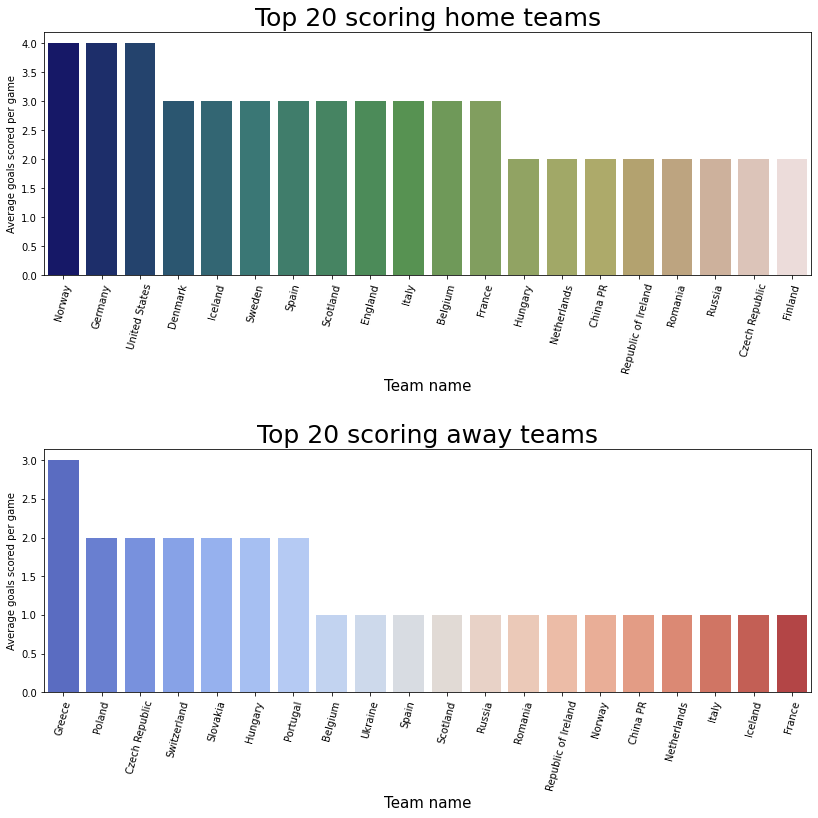

In [20]:
fig6=plt.figure(figsize=(12,12))
ax1=fig6.add_subplot(211)
sns.barplot('home_team','GPG',data=df_gpg_home,palette='gist_earth',ax=ax1)
label1=df_gpg_home['home_team']
ax1.set_xticklabels(label1,rotation=75)
ax1.set_xlabel('Team name',size=15)
ax1.set_ylabel('Average goals scored per game',size=10)
ax1.set_title('Top 20 scoring home teams',size=25)

ax2=fig6.add_subplot(212)
sns.barplot('home_team','GPG',data=df_gpg_away,palette='coolwarm',ax=ax2)
label2=df_gpg_away['home_team']
ax2.set_xticklabels(label2,rotation=75)
ax2.set_xlabel('Team name',size=15)
ax2.set_ylabel('Average goals scored per game',size=10)
ax2.set_title('Top 20 scoring away teams',size=25)

fig6.tight_layout(pad=3)

see, average goals scored per game for home teams is as high as 4 while for away teams, it's only 2 games.

Germany and Norway are leading the top scoring home teams while Poland,Czech Rep, Swizterland,Hungary and Portugal are leading the top scoring away teams.

Popular football hosting cities

which cities have been regularly used for football matches. This indicates that these cities have a rich footballing culture and also a great footballing infrastructure. We shall try to analyse this using a wordcloud.

In [21]:
from wordcloud import WordCloud, STOPWORDS

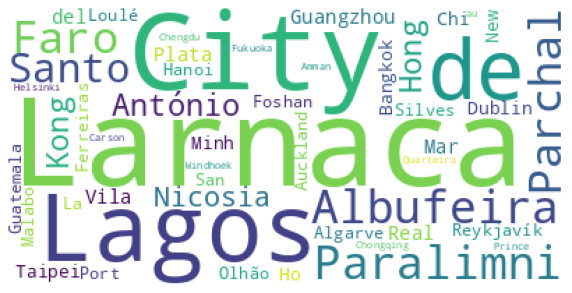

In [22]:
plt.figure(figsize=(10,10))
text_city=df['city'].values
wc_city=WordCloud(max_words=50,background_color='white',collocations=False).generate(str(' '.join(text_city)))
plt.imshow(wc_city)
plt.axis("off")
plt.show()

Popular Women's football hosting countries

Let us perform a simialar wordcloud analysis for cities.

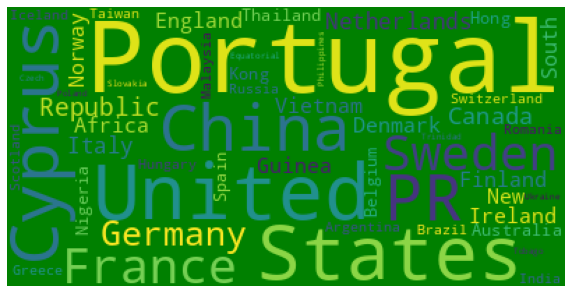

In [23]:
plt.figure(figsize=(10,10))
text_country=df['country'].values
wc_country=WordCloud(max_words=50
                     ,background_color='green',collocations=False).generate(str(' '.join(text_country)))
plt.imshow(wc_country)
plt.axis("off")
plt.show()

Venue type

The venue of the football match could either be Neutral or non neutral in nature. We will check the percentage of each using a pie chart.

In [24]:
df_venue=df.groupby('neutral')['Count'].sum().reset_index()

In [25]:
fig7=px.pie(df_venue,values='Count',names='neutral',hole=0.4,color_discrete_sequence=['orange','green'])
fig7.update_layout(title='Type of venue',title_x=.5,annotations=[dict(text='Neutral ground',font_size=15, showarrow=False,height=800,width=700)])
fig7.update_traces(textfont_size=15,textinfo='percent+label')


fig7.show()

About 44.2 % of matches take place on neutral grounds while 55.8 % matches take place on non neutral grounds. This shows that high number of international matches take place on neutral grounds as opposed to club matches.